In [ ]:
import pandas as pd
import numpy as np

# Replace 'filename.csv' with the actual file path of your dataset
df = pd.read_csv('mnist_train.csv')

# Extract labels (first column)
train_labels = df.iloc[:, 0].values

# Extract pixel values and reshape them into 28x28 images
train_images = df.iloc[:, 1:].values.reshape(-1, 28, 28)



# Replace 'filename.csv' with the actual file path of your dataset
df2 = pd.read_csv('mnist_test.csv')

# Extract labels (first column)
test_labels = df2.iloc[:, 0].values

# Extract pixel values and reshape them into 28x28 images
test_images = df2.iloc[:, 1:].values.reshape(-1, 28, 28)

train_images = train_images.astype('float16')
test_images = test_images.astype('float16')

train_images, test_images = train_images / 255.0, test_images / 255.0

print(test_images.dtype)
print(train_images.dtype)

float16
float16


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Enable mixed precision
from tensorflow.keras.mixed_precision import global_policy, set_global_policy
policy = tf.keras.mixed_precision.Policy('float16')
set_global_policy(policy)

# Load MNIST dataset
"""(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()"""

# Reshape the images
"""train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))"""

# Normalize pixel values to be between 0 and 1


# Convert the labels to categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(8, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, dtype='float16'))  # Ensure that the final layer has float32 dtype

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the CNN model
model.fit(train_images, train_labels, epochs=30)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/30
1875/1875 [==============================] - 19s 4ms/step - loss: inf - accuracy: 0.4944
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5972 - accuracy: 0.8960
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4250 - accuracy: 0.9468
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3406 - accuracy: 0.9678
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2866 - accuracy: 0.9766
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2507 - accuracy: 0.9810
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2274 - accuracy: 0.9849
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2070 - accuracy: 0.9883
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1918 - accuracy: 0.9888
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1807 

model.summary()

In [ ]:
# Getting weights and biases for each layer
weights_conv1, biases_conv1 = model.layers[0].get_weights()
weights_conv2, biases_conv2 = model.layers[2].get_weights()
"""weights_conv3, biases_conv3 = model.layers[4].get_weights()
weights_dense1, biases_dense1 = model.layers[5].get_weights()  # Corrected index"""
weights_dense2, biases_dense2 = model.layers[5].get_weights()  # Corrected index

print(weights_conv1.dtype)


float16


In [ ]:


# Now you can use these weights and biases for your custom forward function
# Save weights and biases to .npy files
np.save('weights_conv1.npy', weights_conv1)
np.save('biases_conv1.npy', biases_conv1)
np.save('weights_conv2.npy', weights_conv2)
np.save('biases_conv2.npy', biases_conv2)
"""np.save('weights_conv3.npy', weights_conv3)
np.save('biases_conv3.npy', biases_conv3)
np.save('weights_dense1.npy', weights_dense1)
np.save('biases_dense1.npy', biases_dense1)"""
np.save('weights_dense2.npy', weights_dense2)
np.save('biases_dense2.npy', biases_dense2)

weights_conv1.tofile('weights_conv1.bin')
biases_conv1.tofile('biases_conv1.bin')
weights_conv2.tofile('weights_conv2.bin')
biases_conv2.tofile('biases_conv2.bin')
weights_dense2.tofile('weights_dense2.bin')
biases_dense2.tofile('biases_dense2.bin')




In [ ]:
# Load weights and biases from .npy files
weights_conv1 = np.load('weights_conv1.npy')
biases_conv1 = np.load('biases_conv1.npy')
weights_conv2 = np.load('weights_conv2.npy')
biases_conv2 = np.load('biases_conv2.npy')
"""weights_conv3 = np.load('weights_conv3.npy')
biases_conv3 = np.load('biases_conv3.npy')
weights_dense1 = np.load('weights_dense1.npy')
biases_dense1 = np.load('biases_dense1.npy')"""
weights_dense2 = np.load('weights_dense2.npy')
biases_dense2 = np.load('biases_dense2.npy')

In [ ]:
weights_conv1_2 = np.load('weights_conv1.npy')
biases_conv1_2  = np.load('biases_conv1.npy')
weights_conv2_2  = np.load('weights_conv2.npy')
biases_conv2_2  = np.load('biases_conv2.npy')
weights_dense2_2  = np.load('weights_dense2.npy')
biases_dense2_2  = np.load('biases_dense2.npy')

# Compare the weights and biases
weights_conv1_are_equal = np.array_equal(weights_conv1, weights_conv1_2)
biases_conv1_are_equal = np.array_equal(biases_conv1, biases_conv1_2)
weights_conv2_are_equal = np.array_equal(weights_conv2, weights_conv2_2)
biases_conv2_are_equal = np.array_equal(biases_conv2, biases_conv2_2)
weights_dense2_are_equal = np.array_equal(weights_dense2, weights_dense2_2)
biases_dense2_are_equal = np.array_equal(biases_dense2, biases_dense2_2)

# Print the comparison results
print('Weights_conv1 are equal:', weights_conv1_are_equal)
print('Biases_conv1 are equal:', biases_conv1_are_equal)
print('Weights_conv2 are equal:', weights_conv2_are_equal)
print('Biases_conv2 are equal:', biases_conv2_are_equal)
print('Weights_dense2 are equal:', weights_dense2_are_equal)
print('Biases_dense2 are equal:', biases_dense2_are_equal)

Weights_conv1 are equal: True
Biases_conv1 are equal: True
Weights_conv2 are equal: True
Biases_conv2 are equal: True
Weights_dense2 are equal: True
Biases_dense2 are equal: True


In [ ]:


# define activation functions
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

# define forward pass functions
def conv2d_forward(X, W, b):
    # X - input, W - weights, b - bias
    h_filter, w_filter, d_filter, n_filters = W.shape
    h, w, d = X.shape
    out = np.zeros((h - h_filter + 1, w - w_filter + 1, n_filters))
    for i in range(h - h_filter + 1):
        for j in range(w - w_filter + 1):
            for k in range(n_filters):
                out[i, j, k] = np.sum(X[i:i+h_filter, j:j+w_filter] * W[:, :, :, k]) + b[k]
    return out

def maxpool2d_forward(X, pool_size):
    h, w, d = X.shape
    h_out = h // pool_size
    w_out = w // pool_size
    out = np.zeros((h_out, w_out, d))
    for i in range(h_out):
        for j in range(w_out):
            for k in range(d):
                out[i, j, k] = np.max(X[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size, k])
    return out

def flatten(X):
    return X.flatten()

def dense_forward(X, W, b):
    return np.dot(W.T, X) + b



In [ ]:
# Assuming weights and biases have been loaded as mentioned before
# Modify the forward function to take these parameters as arguments

def forward(X, W_conv1, b_conv1, W_conv2, b_conv2, W_dense2, b_dense2):
    out = conv2d_forward(X, W_conv1, b_conv1)
    out = relu(out)
    out = maxpool2d_forward(out, 4)
    out = conv2d_forward(out, W_conv2, b_conv2)
    out = relu(out)
    out = maxpool2d_forward(out, 2)
    """   out = conv2d_forward(out, W_conv3, b_conv3)
    out = relu(out)
    out = maxpool2d_forward(out, 2)

    out = dense_forward(out, W_dense1, b_dense1)
    out = relu(out)"""
    out = flatten(out)
    out = dense_forward(out, W_dense2, b_dense2)
    out = softmax(out)
    return out

# Call the function with a single image from the test dataset and the weights and biases

image_index = 96
single_image = test_images[image_index]  # assuming test_images is your test dataset

# Ensure that the single image has the right shape (28, 28, 1)
single_image = np.reshape(single_image, (28, 28, 1))

output = forward(single_image, weights_conv1, biases_conv1, weights_conv2, biases_conv2, weights_dense2, biases_dense2)

print(np.argmax(output))

7


Test image shape: (28, 28)
Test label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


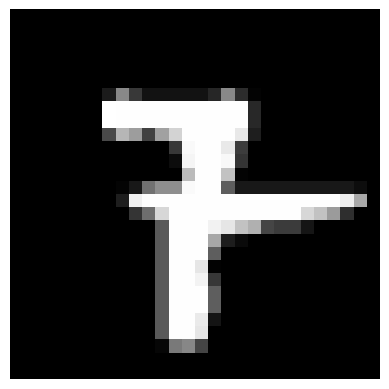

In [ ]:
import matplotlib.pyplot as plt



print("Test image shape:", test_images[image_index].shape)  # (28, 28)
print("Test label:", test_labels[image_index])  # The label (0 to 9)

x = test_images[image_index]

x = x.reshape(28, 28, 1)



# Assuming you already have 'x' containing the image data

# Reshape the image back to 28x28 (if necessary)
if len(x.shape) == 3:
    x = x.reshape(28, 28)

# Display the image using matplotlib
plt.imshow(x, cmap='gray')
plt.axis('off')  # Turn off axis ticks and labels
plt.show()


In [ ]:
correct_predictions = 0
#(x_train, y_train), (x_test, y_test) = mnist.load_data() #%%This was doing before
# iterate over the test set
#for i in range(len(x_test)):

for i in range(1000):
    # prepare the input
    x = test_images[i].astype(np.float16)

    # Ensure that the single image has the right shape (28, 28, 1)
    single_image = np.reshape(x, (28, 28, 1))

    #output = forward(single_image, weights_conv1, biases_conv1, weights_conv2, biases_conv2, weights_conv3, biases_conv3, weights_dense1, biases_dense1, weights_dense2, biases_dense2)
    output = forward(single_image, weights_conv1, biases_conv1, weights_conv2, biases_conv2, weights_dense2, biases_dense2)

    # Find the index of the maximum value
    prediction = np.argmax(output)

    # compare the prediction with the actual label
    actual_label = np.argmax(test_labels[i])
    #actual_label = test_labels[i]

    if prediction == actual_label:
        correct_predictions += 1

# calculate the accuracy
accuracy = correct_predictions / 1000
print("The accuracy of the forward_pass function is:", accuracy)

The accuracy of the forward_pass function is: 0.932


In [ ]:
print(weights_conv1.dtype)

float16
